In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam


In [ ]:
# Load the dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)  # Features
y = pd.Series(data.target, name="target")  # Target labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data for better performance in CNN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data preprocessing complete!")
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Data preprocessing complete!
Training data shape: (455, 30)
Testing data shape: (114, 30)


Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



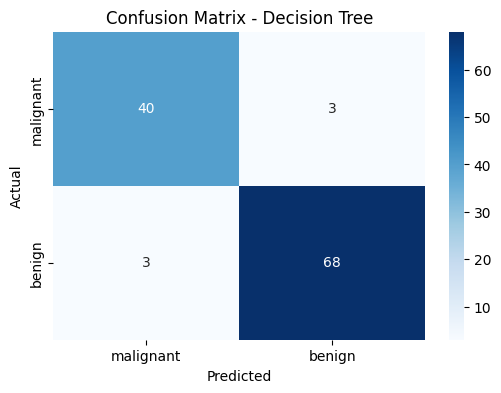

Confusion matrix for Decision Tree saved as 'confusion_matrix_decision_tree.png'.


<Figure size 640x480 with 0 Axes>

In [ ]:
# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)  # Initialize Decision Tree
dt.fit(X_train, y_train)  # Train the model on the training set
y_pred_dt = dt.predict(X_test)  # Predict on the testing set

# Evaluate Decision Tree
print("Decision Tree Classification Report:\n")
print(classification_report(y_test, y_pred_dt))  # Print classification metrics

# Confusion Matrix - Decision Tree
dt_cm = confusion_matrix(y_test, y_pred_dt)  # Generate confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(dt_cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Save the Confusion Matrix
plt.savefig("confusion_matrix_decision_tree.png")
print("Confusion matrix for Decision Tree saved as 'confusion_matrix_decision_tree.png'.")


Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



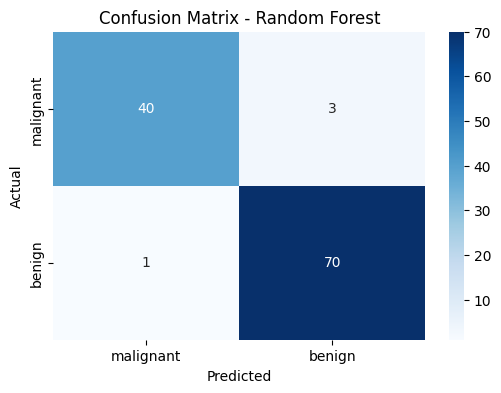

Confusion matrix for Random Forest saved as 'confusion_matrix_random_forest.png'.


<Figure size 640x480 with 0 Axes>

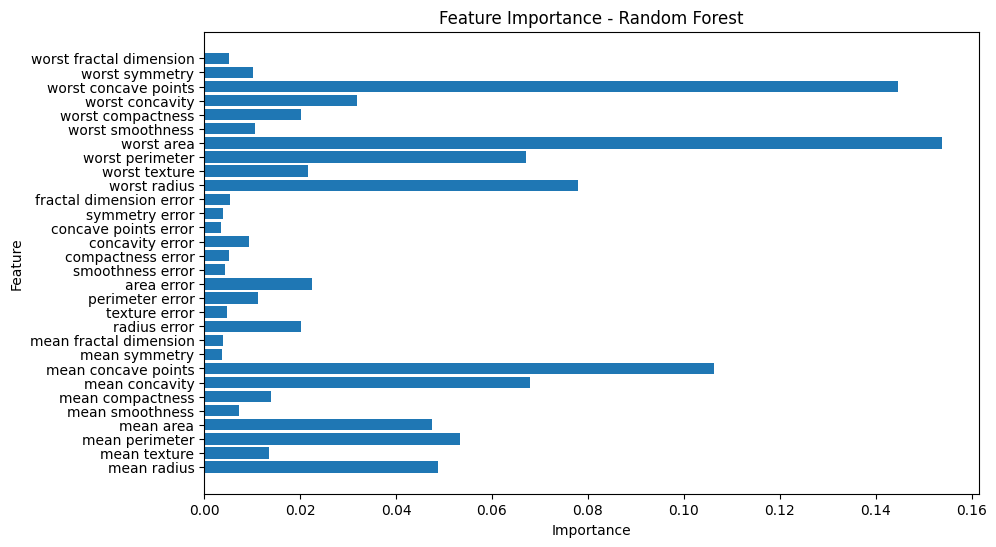

Feature importance plot saved as 'feature_importance_random_forest.png'.


<Figure size 640x480 with 0 Axes>

In [ ]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # Initialize Random Forest
rf.fit(X_train, y_train)  # Train the model on the training set
y_pred_rf = rf.predict(X_test)  # Predict on the testing set

# Evaluate Random Forest
print("Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf))  # Print classification metrics

# Confusion Matrix - Random Forest
rf_cm = confusion_matrix(y_test, y_pred_rf)  # Generate confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Save the Confusion Matrix
plt.savefig("confusion_matrix_random_forest.png")
print("Confusion matrix for Random Forest saved as 'confusion_matrix_random_forest.png'.")

# Feature Importance - Random Forest
importances = rf.feature_importances_  # Get feature importance
plt.figure(figsize=(10, 6))
plt.barh(data.feature_names, importances)  # Plot feature importance
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Save Feature Importance Plot
plt.savefig("feature_importance_random_forest.png")
print("Feature importance plot saved as 'feature_importance_random_forest.png'.")


Feature importance plot saved as 'feature_importance_random_forest.png'.


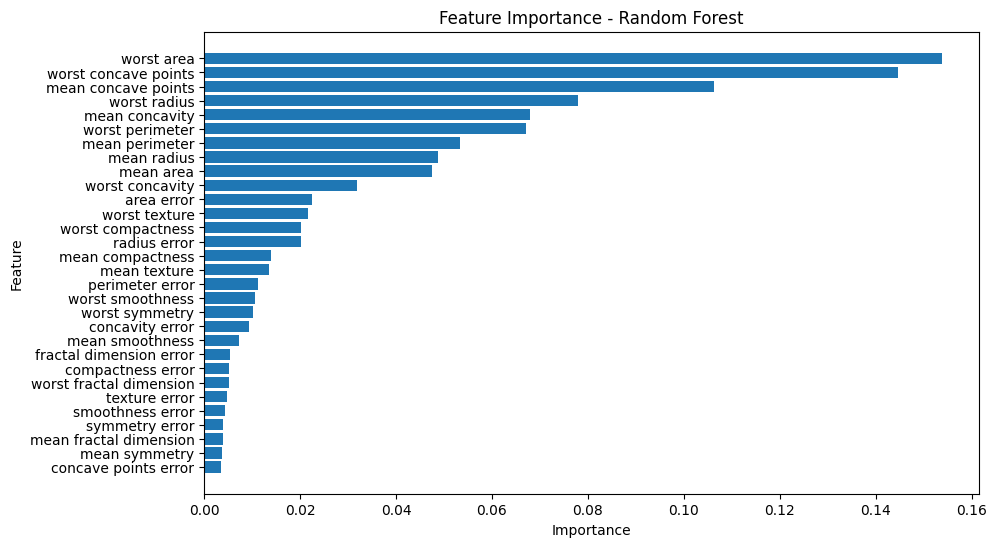

In [ ]:
# Feature Importance - Random Forest
importances = rf.feature_importances_
sorted_indices = np.argsort(importances)  # Sort by importance
sorted_features = np.array(data.feature_names)[sorted_indices]
sorted_importances = importances[sorted_indices]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances)  # Plot sorted feature importance
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.savefig("feature_importance_random_forest.png")  # Save the plot
print("Feature importance plot saved as 'feature_importance_random_forest.png'.")
plt.show()


Model accuracy summary saved as 'model_accuracy_summary.csv'.
Model accuracy comparison chart saved as 'model_accuracy_comparison.png'.


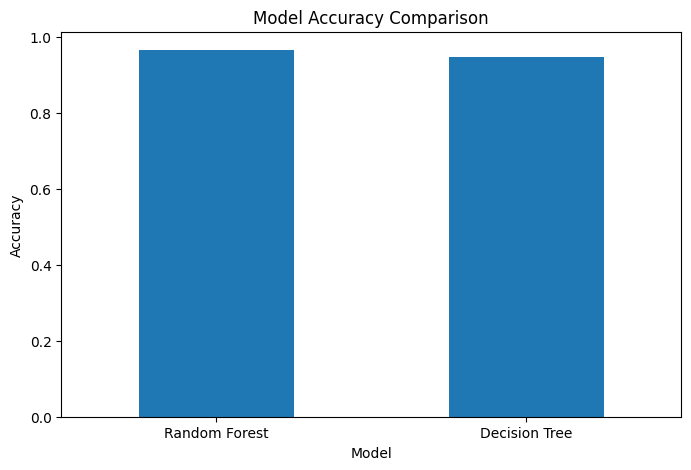

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate Model Accuracies
dt_accuracy = accuracy_score(y_test, y_pred_dt)  # Accuracy for Decision Tree
rf_accuracy = accuracy_score(y_test, y_pred_rf)  # Accuracy for Random Forest

# Create Accuracy Summary
accuracy_summary = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest"],
    "Accuracy": [dt_accuracy, rf_accuracy]
})

# Sort by Accuracy (optional)
accuracy_summary = accuracy_summary.sort_values(by="Accuracy", ascending=False)

# Save Accuracy Summary
accuracy_summary.to_csv("model_accuracy_summary.csv", index=False)
print("Model accuracy summary saved as 'model_accuracy_summary.csv'.")

# Plot Accuracy Comparison
accuracy_summary.plot(kind="bar", x="Model", y="Accuracy", legend=False, figsize=(8, 5))  # Bar chart
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=0)
plt.savefig("model_accuracy_comparison.png")  # Save the plot
print("Model accuracy comparison chart saved as 'model_accuracy_comparison.png'.")
plt.show()


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7563 - loss: 0.5459 - val_accuracy: 0.9670 - val_loss: 0.2592
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9451 - loss: 0.2289 - val_accuracy: 0.9670 - val_loss: 0.1578
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9620 - loss: 0.1223 - val_accuracy: 0.9670 - val_loss: 0.1220
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9673 - loss: 0.0865 - val_accuracy: 0.9670 - val_loss: 0.1081
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9808 - loss: 0.0754 - val_accuracy: 0.9670 - val_loss: 0.1008
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9666 - loss: 0.0792 

CNN Test Accuracy: 0.97


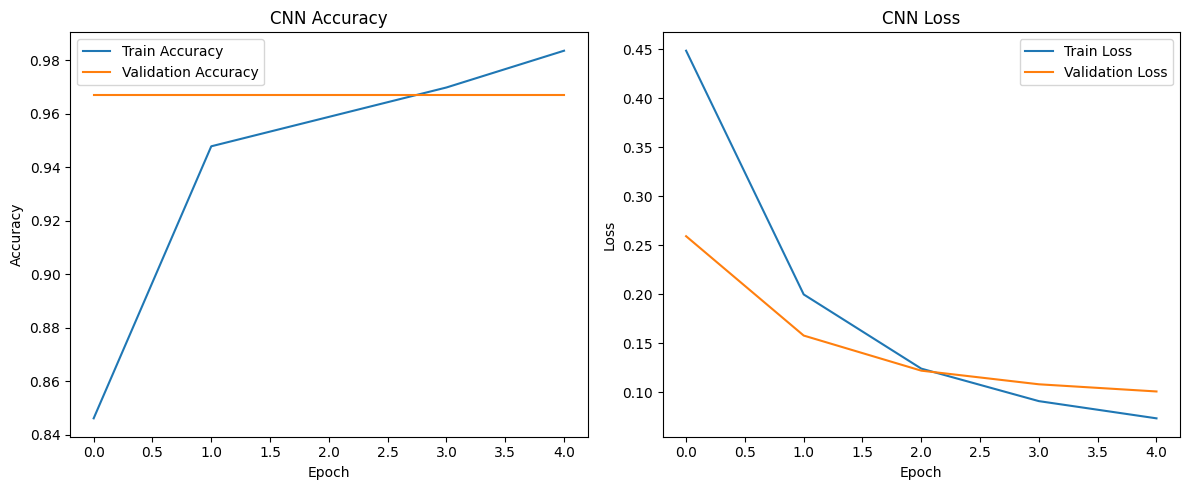

Training and validation plots saved as 'cnn_training_validation.png'.


In [ ]:
# Build a Simple CNN
cnn_model = Sequential([
    Flatten(input_shape=(X_train_scaled.shape[1],)),  # Flatten input features
    Dense(128, activation='relu'),  # First hidden layer
    Dense(64, activation='relu'),   # Second hidden layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the Model
cnn_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model
history = cnn_model.fit(X_train_scaled, y_train, epochs=5, validation_split=0.2, verbose=1)

# Evaluate the Model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_scaled, y_test)
print(f"\nCNN Test Accuracy: {cnn_accuracy:.2f}")

# Plot Training and Validation Accuracy/Loss
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig("cnn_training_validation.png")  # Save the plot
plt.show()
print("Training and validation plots saved as 'cnn_training_validation.png'.")


In [ ]:
from sklearn.metrics import accuracy_score

# Calculate Accuracy
dt_accuracy = accuracy_score(y_test, y_pred_dt)  # Accuracy for Decision Tree
rf_accuracy = accuracy_score(y_test, y_pred_rf)  # Accuracy for Random Forest

# Print the Accuracies
print("\nModel Accuracies:")
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

# Create a Summary Table
accuracy_summary = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest"],
    "Accuracy": [dt_accuracy, rf_accuracy]
})

# Save the Summary as a CSV File
accuracy_summary.to_csv("model_accuracy_summary.csv", index=False)
print("\nModel accuracy summary saved as 'model_accuracy_summary.csv'.")



Model Accuracies:
Decision Tree Accuracy: 0.95
Random Forest Accuracy: 0.96

Model accuracy summary saved as 'model_accuracy_summary.csv'.


In [ ]:
# Create Accuracy Summary
accuracy_summary = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest"],
    "Accuracy": [dt_accuracy, rf_accuracy]
})

# Sort by Accuracy (optional)
accuracy_summary = accuracy_summary.sort_values(by="Accuracy", ascending=False)

# Save to CSV
accuracy_summary.to_csv("model_accuracy_summary.csv", index=False)
print("Model accuracy summary saved as 'model_accuracy_summary.csv'.")


Model accuracy summary saved as 'model_accuracy_summary.csv'.
